In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

movies_df = pd.read_csv("data/imdbratings.csv")
movies_df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"'Tim Robbins', 'Morgan Freeman', 'Bob Gnton'"
1,9.2,The Godfather,R,Crime,175,"'Marlon Brando', 'Al Pacino', 'James Caan'"
2,9.1,The Godfather: Part II,R,Crime,200,"'Al Pacino', 'Robert De Niro', 'Robert Dvall'"
3,9.0,The Dark Knight,PG-13,Action,152,"'Christian Bale', 'Heath Ledger', 'Aaron Eckhart'"
4,8.9,Pulp Fiction,R,Crime,154,"'John Travolta', 'Uma Thrman', 'Samel L. Jackson'"


In [2]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [3]:
movies_df["actors_list"] = movies_df.actors_list.str.replace("'", "")
movies_df["actors_list"] = movies_df.actors_list.str.replace('"', "")

movies_df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gnton"
1,9.2,The Godfather,R,Crime,175,"Marlon Brando, Al Pacino, James Caan"
2,9.1,The Godfather: Part II,R,Crime,200,"Al Pacino, Robert De Niro, Robert Dvall"
3,9.0,The Dark Knight,PG-13,Action,152,"Christian Bale, Heath Ledger, Aaron Eckhart"
4,8.9,Pulp Fiction,R,Crime,154,"John Travolta, Uma Thrman, Samel L. Jackson"


In [4]:
from collections import Counter

list_of_actors = []
for actors in movies_df.actors_list:
    list_of_actors.append(actors.split(", "))
    
actors_counter = Counter()
for actor in list_of_actors:
    actors_counter.update(actor)
    
actors_counter.most_common(20)

[('Robert De Niro', 18),
 ('Clint Eastwood', 14),
 ('Brad Pitt', 14),
 ('Tom Hanks', 14),
 ('Al Pacino', 13),
 ('Johnny Depp', 12),
 ('Christian Bale', 11),
 ('Leonardo DiCaprio', 11),
 ('Dstin Hoffman', 11),
 ('Harrison Ford', 10),
 ('James Stewart', 10),
 ('Jlianne Moore', 10),
 ('Denzel Washington', 10),
 ('Jack Nicholson', 9),
 ('Rssell Crowe', 9),
 ('Sean Connery', 9),
 ('Ed Harris', 9),
 ('Ethan Hawke', 9),
 ('Morgan Freeman', 8),
 ('Ian McKellen', 8)]

Text(0.5, 0, 'Number of movies tourned as pricipale role')

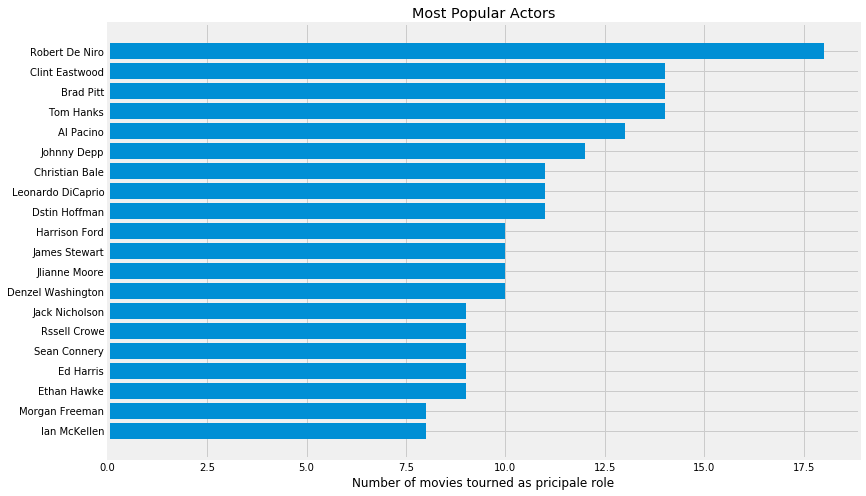

In [5]:
actors = [item[0] for item in actors_counter.most_common(20)]
presences = [item[1] for item in actors_counter.most_common(20)]

actors.reverse()
presences.reverse()

plt.figure(figsize=(12, 8))
plt.barh(actors, presences)

plt.title("Most Popular Actors")
plt.xlabel("Number of movies tourned as pricipale role")

This apairs to be a week appraoch, it better to take only movies with hight rating.

In [6]:
movies_df[movies_df.star_rating > 8]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gnton"
1,9.2,The Godfather,R,Crime,175,"Marlon Brando, Al Pacino, James Caan"
2,9.1,The Godfather: Part II,R,Crime,200,"Al Pacino, Robert De Niro, Robert Dvall"
3,9.0,The Dark Knight,PG-13,Action,152,"Christian Bale, Heath Ledger, Aaron Eckhart"
4,8.9,Pulp Fiction,R,Crime,154,"John Travolta, Uma Thrman, Samel L. Jackson"
5,8.9,12 Angry Men,NOT RATED,Drama,96,"Henry Fonda, Lee J. Cobb, Martin Balsam"
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"Clint Eastwood, Eli Wallach, Lee Van Cleef"
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"Elijah Wood, Viggo Mortensen, Ian McKellen"
8,8.9,Schindler's List,R,Biography,195,"Liam Neeson, Ralph Fiennes, Ben Kingsley"
9,8.9,Fight Club,R,Drama,139,"Brad Pitt, Edward Norton, Helena Bonham Carter"


In [7]:
list_of_actors = []
best_movies = movies_df[movies_df.star_rating > 8]

for actors in best_movies.actors_list:
    list_of_actors.append(actors.split(", "))
    
actors_counter = Counter()
for actor in list_of_actors:
    actors_counter.update(actor)
    
actors_counter.most_common(20)

[('Robert De Niro', 8),
 ('James Stewart', 8),
 ('Clint Eastwood', 6),
 ('Harrison Ford', 6),
 ('Cary Grant', 6),
 ('Al Pacino', 5),
 ('Brad Pitt', 5),
 ('Leonardo DiCaprio', 5),
 ('Tom Hanks', 5),
 ('Charles Chaplin', 5),
 ('William Holden', 5),
 ('Aamir Khan', 5),
 ('Pal Newman', 5),
 ('Morgan Freeman', 4),
 ('Marlon Brando', 4),
 ('Christian Bale', 4),
 ('Ian McKellen', 4),
 ('Jack Nicholson', 4),
 ('Kevin Spacey', 4),
 ('Hmphrey Bogart', 4)]

Text(0.5, 0, 'Number of movies tourned as pricipale role')

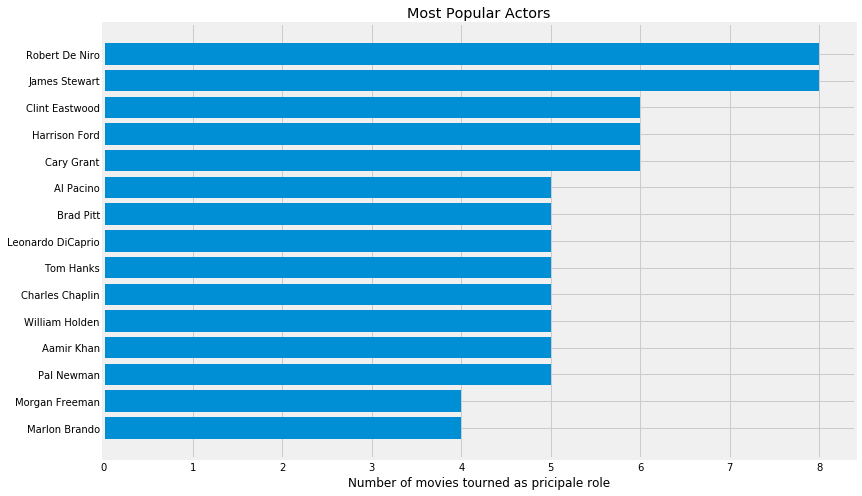

In [8]:
actors = [item[0] for item in actors_counter.most_common(15)]
presences = [item[1] for item in actors_counter.most_common(15)]

actors.reverse()
presences.reverse()

plt.figure(figsize=(12, 8))
plt.barh(actors, presences)

plt.title("Most Popular Actors")
plt.xlabel("Number of movies tourned as pricipale role")